<a href="https://colab.research.google.com/github/amirhnazerii/CNN_Multiclass_Classification/blob/main/CNN_Cars_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Multiclasses Image Classification

__author__ = "Amir Nazeri" 

__copyright__ = "Copyright 2021, The Advanced Neural Network Project @CU-ICAR"

__license__ = "GPL"

__version__ = "3.1"

__email__ = "anazeri@clemson.edu"


## Problem Description
This dataset consists of four different classes: **Bicycle, Motorcycle, Car, Truck**. Bicycle, Motorcycle, and Car data are collected from the 2005 PASCAL dataset [VOC2005](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1). Moreover, the Truck data is collected from the Internet.

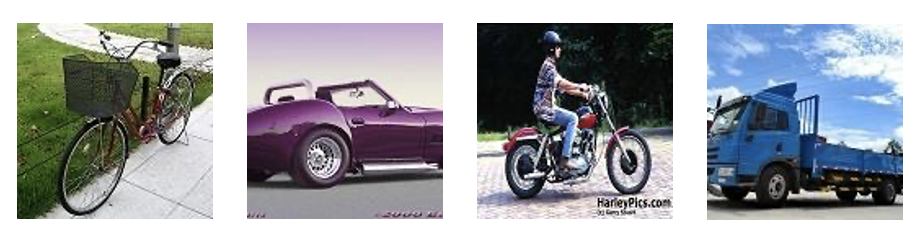



- The width and height of each **RGB** image are 120 pixels and 120 pixels respectively.
- The filename of an image represents its index.
- Labels are saved in `labels.csv` where the first column is the image index and the second column is the label.
- Labels and their corresponding classes are listed below.

|Label|0|1|2|3|
|-----|:-:|:-:|:-:|:-:|
|Class|Bicycle|Car|Motocycle|Truck|

## Load and Pre-Process Dataset

In [ ]:
# used to aviod runtime stop
import gc
gc.collect()

3

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,Activation,BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop 



In [ ]:
def load_data(folder):
    """
      Load the dataset, included images and labels from the given folder.
      
      Parameters
      ----------
      folder: string
          Path of the folder saved dataset.

      Return
      ----------
      images: ndarray
          Output of images.
      labels: ndarray
          Output of labels.
    """

    files_im = sorted(glob.glob(folder+'/*.jpg', 
                    recursive = True))

    files_csv = glob.glob(folder+'/*.csv', 
                      recursive = True)

    # read the image
    images = []    
    for filepath in files_im:   
        im = Image.open(filepath)   # from pillow package
        images.append(np.array(im))
    images= np.array(images) 
    # read the csv file
    csv_label = pd.read_csv(files_csv[0])
    labels= csv_label["label"]
    return images, labels


In [ ]:
def preprocess(X, y, train_size=0.8):
    """
        Normalize the features from the range [0, 255] to the range [0, 1].
        One-hot encode labels.
        Split the dataset into training set and test set. 
        
        Parameters
        ----------
        X: ndarray
            Input of images.
        y: ndarray
            Input of labels.
        train_size: float
            The proportion of the dataset to include in the train split.

        Return
        ----------
        X_train: ndarray
            Splitted features of the training data.
        y_train: ndarray
            Splitted labels of the traning data.
        X_test: ndarray
            Splitted features of the test data.
        y_test: ndarray
            Splitted labels of the test data.
    """
    X = X/255.0       # X: images
    labels_hot = tf.keras.utils.to_categorical(y)      # y: labels
    X_train, X_test, y_train, y_test = train_test_split(X, labels_hot ,train_size=train_size, random_state=None, shuffle=True)
    return X_train, y_train, X_test, y_test 

In [ ]:
folder = '/content/gdrive/MyDrive/dataset'
images, labels = load_data(folder)
# TODO: pre-process dataset
X_train, y_train, X_test, y_test   = preprocess(images, labels, train_size=0.8)
# TODO: print out shapes of X_train, y_train, X_test, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(759, 120, 120, 3) (190, 120, 120, 3) (759, 4) (190, 4)


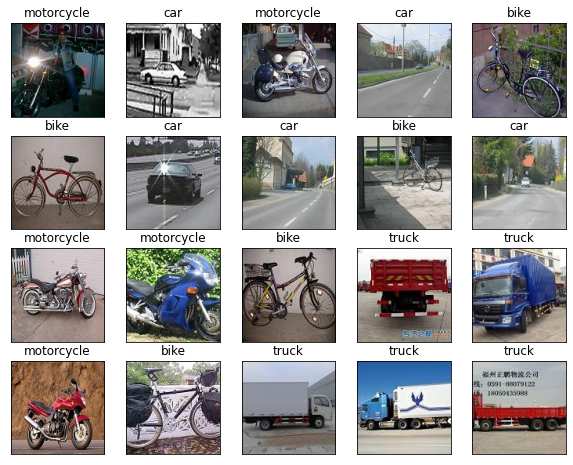

In [ ]:
examples = []
count_b = 0
count_c = 0
count_m = 0
count_t = 0

for i in range(len(X_train)):
    if y_train[i][0] == 1 and count_b<5:
      examples.append(["bike",X_train[i]])
      count_b = count_b +1
    if y_train[i][1] == 1 and count_c<5:
      examples.append(["car",X_train[i]])
      count_c = count_c +1
    if y_train[i][2] == 1 and count_m<5:
      examples.append(["motorcycle",X_train[i]])
      count_m = count_m +1
    if y_train[i][3] == 1 and count_t<5:
      examples.append(["truck",X_train[i]])
      count_t = count_t +1

# plot out selected examples in ONE figure

plt.figure(figsize=(10,10))
for i in range(len(examples)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(examples[i][0])
    plt.imshow(examples[i][1])

plt.show()


## Build Convolutional Neural Network

In [ ]:
# build a CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

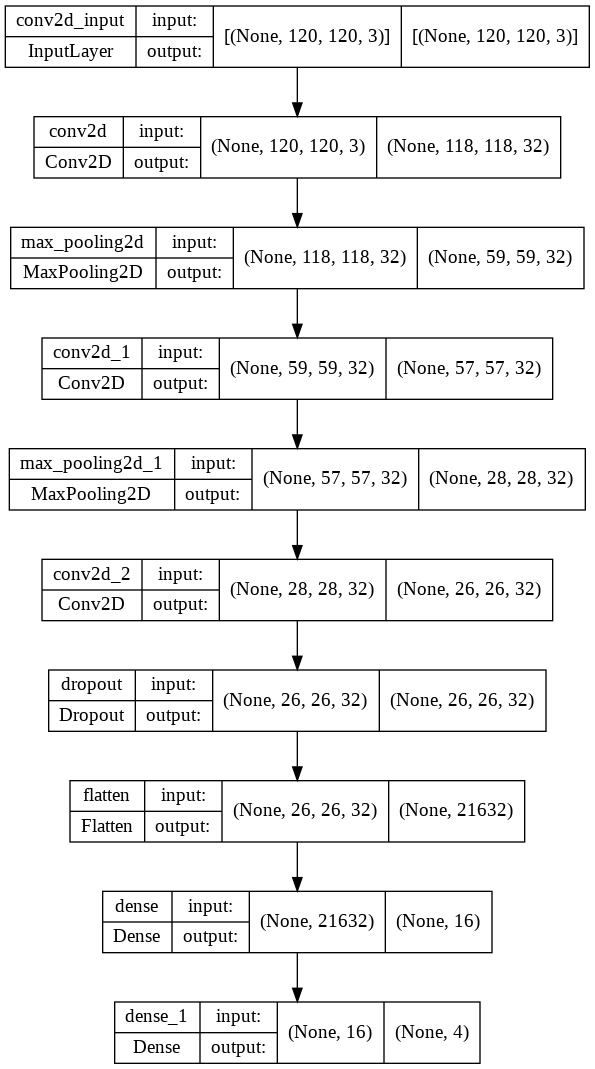

In [ ]:
# visualize the model
tf.keras.utils.plot_model(model, show_shapes= True)

## Train Model

In [ ]:
# initialize hyperparameters
batch_size = 64
epochs = 50
lr = 3e-4

In [ ]:
# train the model
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.Adam(lr),
              metrics =['accuracy'])
  
# fit the model
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 2,
          validation_data =(X_test, y_test))


Epoch 1/50
12/12 - 1s - loss: 1.2966 - accuracy: 0.3663 - val_loss: 1.2296 - val_accuracy: 0.3947 - 1s/epoch - 114ms/step
Epoch 2/50
12/12 - 1s - loss: 1.1683 - accuracy: 0.5283 - val_loss: 1.0300 - val_accuracy: 0.5842 - 513ms/epoch - 43ms/step
Epoch 3/50
12/12 - 0s - loss: 1.0180 - accuracy: 0.5810 - val_loss: 0.9084 - val_accuracy: 0.5947 - 499ms/epoch - 42ms/step
Epoch 4/50
12/12 - 1s - loss: 0.9074 - accuracy: 0.6206 - val_loss: 0.8439 - val_accuracy: 0.6211 - 513ms/epoch - 43ms/step
Epoch 5/50
12/12 - 1s - loss: 0.8224 - accuracy: 0.6667 - val_loss: 0.8198 - val_accuracy: 0.6684 - 504ms/epoch - 42ms/step
Epoch 6/50
12/12 - 1s - loss: 0.7650 - accuracy: 0.7009 - val_loss: 0.8018 - val_accuracy: 0.6368 - 502ms/epoch - 42ms/step
Epoch 7/50
12/12 - 1s - loss: 0.6870 - accuracy: 0.7497 - val_loss: 0.7825 - val_accuracy: 0.6579 - 505ms/epoch - 42ms/step
Epoch 8/50
12/12 - 1s - loss: 0.6274 - accuracy: 0.7918 - val_loss: 0.7317 - val_accuracy: 0.6789 - 514ms/epoch - 43ms/step
Epoch 9/50

In [ ]:
# saved model here:
model.save('final_model.h5')

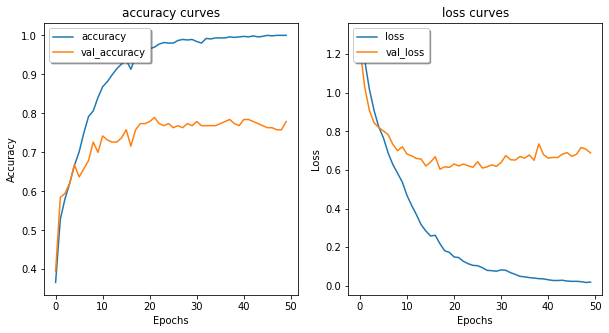

In [ ]:
# visualize the training history including accuracy curves and loss curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=1, shadow=True, title=None, fancybox=True)
ax1.set_title('accuracy curves')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=1, shadow=True, title=None, fancybox=True)
ax2.set_title('loss curves')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

plt.show()

In [ ]:
def pick_rand_sample(folder,num_sample):
    """
      Load the dataset, included images and labels from the given folder.
      
      Parameters
      ----------
      folder: string
          Path of the folder saved dataset.

      Return
      ----------
      images: ndarray
          Output of images.

    """

    files_im = sorted(glob.glob(folder+'/*.jpg', 
                    recursive = True))
    samples_im = random.sample(files_im, num_sample)
    # read the image
    images = []    
    for filepath in samples_im:   
        im = Image.open(filepath)   # from pillow package
        images.append(np.array(im))
    images= np.array(images) 

    return images/255



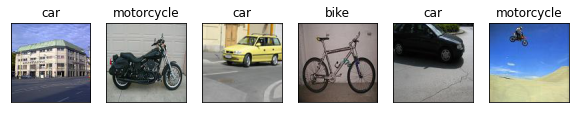

In [ ]:
# visualize some examples with predicted labels

from keras.models import load_model
import random

# number fo examples we want to retreive 
num_rand_im = 6

model_ = load_model('final_model.h5')
images_rand= pick_rand_sample('/content/gdrive/MyDrive/dataset',num_rand_im)
# predict the class of label
predicted_label = model_.predict(images_rand)
classes_x=np.argmax(predicted_label,axis=1)

plt.figure(figsize=(10,10))
for i in range(len(images_rand)):
    plt.subplot(1,num_rand_im,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if classes_x[i] == 0:
        plt.title("bike")
    if classes_x[i] == 1:
        plt.title("car")
    if classes_x[i] == 2:
        plt.title("motorcycle")
    if classes_x[i] == 3:
        plt.title("truck")   
    plt.imshow(images_rand[i])

plt.show()

## Tune Hyperparameters

In [ ]:
pip install keras-tuner --upgrade


     |████████████████████████████████| 98 kB 3.0 MB/s 


In [ ]:
from tensorflow import keras
from keras import layers
import keras_tuner as kt

def build_model(hp):
  inputs = tf.keras.Input(shape=(120, 120, 3))
  x = inputs
  for i in range(hp.Int('conv_layers_', 2, 3, default=3)):
    x = tf.keras.layers.Conv2D( 
       filters=hp.Int('filters_'+str(i),8,32, step = 8),
       kernel_size=hp.Int('kernel_size_'+str(i),3,5,step=2),
       activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D()(x)
    x = tf.keras.layers.BatchNormalization()(x)

  x = tf.keras.layers.Flatten()(x)

  x = tf.keras.layers.Dense(
      hp.Int('hidden_size', 16, 64, step=16, default=16),
      activation='relu')(x)
  if hp.Choice('act_output_layer',['softmax', 'sigmoid']) == 'softmax':
      outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
  else:
      outputs = tf.keras.layers.Dense(4, activation='sigmoid')(x)
  model = tf.keras.Model(inputs, outputs)
  model.compile(
    optimizer=tf.keras.optimizers.Adam(
      hp.Float('learning_rate', 1e-4, 1e-3, sampling='log')),
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.BayesianOptimization(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=25,
    num_initial_points=5,
)

In [ ]:
# I did tune search with epochs= 30, later when I find a proper guess I will sweep epoch number as well. it is discussed in Task 5.
tuner.search(X_train,y_train,epochs=25,validation_data=(X_test,y_test))     

Trial 25 Complete [00h 00m 21s]
val_accuracy: 0.7631579041481018

Best val_accuracy So Far: 0.8052631616592407
Total elapsed time: 00h 12m 27s
INFO:tensorflow:Oracle triggered exit



I tuned the hyperparamters to get the optimal CNN model by utilizing Keras tuner module. number of convolutional layers, kernels, filters, etc have been tuned to report the best optimal value of validation accuracy. maximum trial of 25 and num_intial_points is set to 5. after running the tuning simulation for 30 epochs Best val_accuracy of 0.86 is reported along with original accuracy close to 1.    




## Conclusion

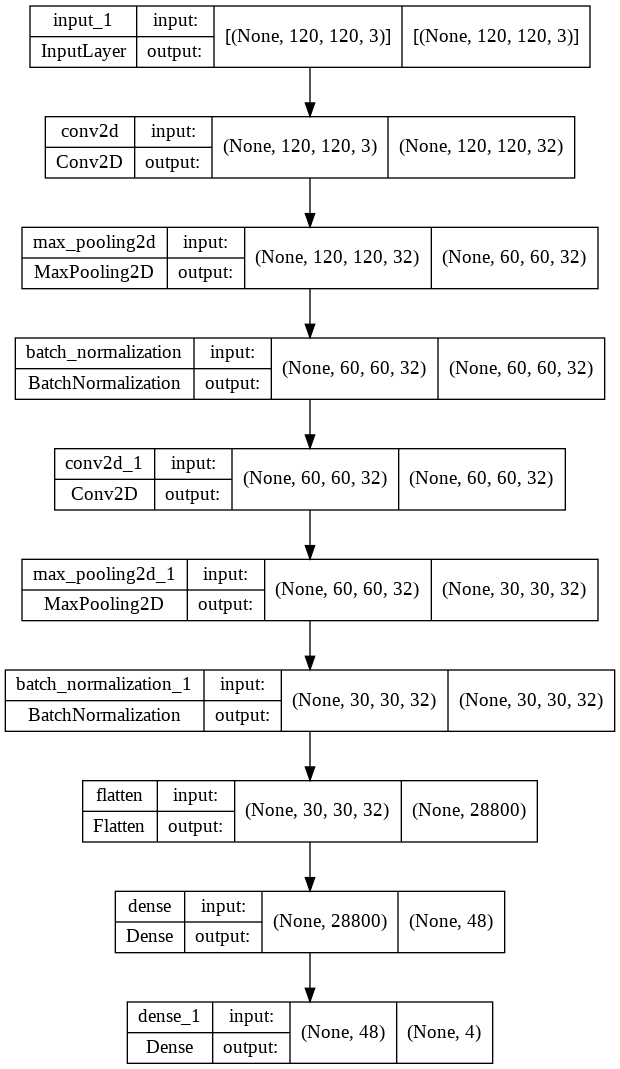

In [ ]:
# visualize the optimal model

# Getting the optimal model
best_model = tuner.get_best_models()[0]
# Getting the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters()[0]

# visualize the optimal model
tf.keras.utils.plot_model(best_model, show_shapes= True)

**List of hyperparameters and their values of your optimal model**


*   num_conv2d_layers = 2,
*   filter_0 = 32,
*   Kernel_size_0 = 5,
*   filter_1 = 32,
*   LKernel_size_1 = 5,
*   filter_2 = 32,
*   Kernel_size_2 = 5,
*   hidden_layer_size = 48,
*   activation= softmax,
*   learning_rate= 0.001,
*   epoch = 53







In [ ]:
# Now I do this part to find the best epoch number, by running the tuned optimal model again with optimal Hps. 

model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=55, validation_split=0.2)

val_accu_per_epoch = history.history['val_accuracy']
best_epoch = val_accu_per_epoch.index(max(val_accu_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/55
19/19 [==============================] - 3s 88ms/step - loss: 1.9092 - accuracy: 0.5305 - val_loss: 1.2891 - val_accuracy: 0.3882
Epoch 2/55
19/19 [==============================] - 1s 35ms/step - loss: 0.6037 - accuracy: 0.7957 - val_loss: 1.4490 - val_accuracy: 0.4145
Epoch 3/55
19/19 [==============================] - 1s 33ms/step - loss: 0.2671 - accuracy: 0.8979 - val_loss: 2.2909 - val_accuracy: 0.1842
Epoch 4/55
19/19 [==============================] - 1s 32ms/step - loss: 0.1169 - accuracy: 0.9588 - val_loss: 1.5772 - val_accuracy: 0.3158
Epoch 5/55
19/19 [==============================] - 1s 33ms/step - loss: 0.0596 - accuracy: 0.9852 - val_loss: 2.2167 - val_accuracy: 0.2632
Epoch 6/55
19/19 [==============================] - 1s 32ms/step - loss: 0.0378 - accuracy: 0.9868 - val_loss: 3.0752 - val_accuracy: 0.2566
Epoch 7/55
19/19 [==============================] - 1s 33ms/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 2.3578 - val_accuracy: 0.3618
Epoch 8/55
19

In [ ]:
# After finding the "best epoch", I retrain the optimal model again with the best epoch value.
hypermodel = tuner.hypermodel.build(best_hps)
# Retrain the model
history= hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)


Epoch 1/53
19/19 [==============================] - 2s 50ms/step - loss: 1.7096 - accuracy: 0.5222 - val_loss: 1.8095 - val_accuracy: 0.4539
Epoch 2/53
19/19 [==============================] - 1s 33ms/step - loss: 0.7183 - accuracy: 0.7035 - val_loss: 1.4050 - val_accuracy: 0.5197
Epoch 3/53
19/19 [==============================] - 1s 33ms/step - loss: 0.3747 - accuracy: 0.8616 - val_loss: 1.4737 - val_accuracy: 0.3092
Epoch 4/53
19/19 [==============================] - 1s 33ms/step - loss: 0.2339 - accuracy: 0.9110 - val_loss: 1.4462 - val_accuracy: 0.4671
Epoch 5/53
19/19 [==============================] - 1s 33ms/step - loss: 0.1003 - accuracy: 0.9703 - val_loss: 1.4543 - val_accuracy: 0.5329
Epoch 6/53
19/19 [==============================] - 1s 33ms/step - loss: 0.0440 - accuracy: 0.9918 - val_loss: 1.6318 - val_accuracy: 0.4737
Epoch 7/53
19/19 [==============================] - 1s 34ms/step - loss: 0.0313 - accuracy: 0.9951 - val_loss: 2.2931 - val_accuracy: 0.2895
Epoch 8/53
19

In [ ]:
model.save('final_model_tuned.h5')

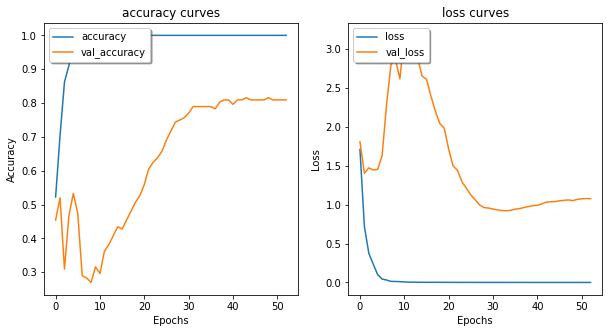

In [ ]:
# visualize the training history including accuracy curves and loss curves of your optimal model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label = 'val_accuracy')
ax1.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=1, shadow=True, title=None, fancybox=True)
ax1.set_title('accuracy curves')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')

ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label = 'val_loss')
ax2.legend(loc="upper left", bbox_to_anchor=[0, 1],ncol=1, shadow=True, title=None, fancybox=True)
ax2.set_title('loss curves')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

plt.show()



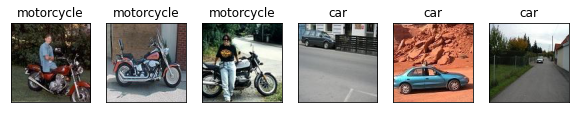

In [ ]:
# visualize some examples with predicted labels
from keras.models import load_model
import random

num_rand_im = 6

model_tuned = load_model('final_model_tuned.h5')
images_rand= pick_rand_sample('/content/gdrive/MyDrive/dataset',num_rand_im)
# predict the class
predicted_label = model_tuned.predict(images_rand)
classes_x=np.argmax(predicted_label,axis=1)

plt.figure(figsize=(10,10))
for i in range(len(images_rand)):
    plt.subplot(1,num_rand_im,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if classes_x[i] == 0:
        plt.title("bike")
    if classes_x[i] == 1:
        plt.title("car")
    if classes_x[i] == 2:
        plt.title("motorcycle")
    if classes_x[i] == 3:
        plt.title("truck")   
    plt.imshow(images_rand[i])

plt.show()


